## Advertising Data EDA 
#### Nitisha Agarwal 
#### Aug 25, 2023

This is a Kaggle dataset I will use to practice EDA in PYthon with mostly pandas and seaborn. \
https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on-ad

1. Import modules and read data
2. Initial Exploration: columns, dtypes, info, describe
3. Drop / Rename columns & get numeric cols
4. Missing values / duplicates / outlier detection
5. Create some important/relevant metrics as new columns
6. Boxplots / Pairplot / Correlation for important numeric variables
7. Guiding questions -- do some groupbys, look at distributions
8. Conclusions

### 1. Import modules and read data

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


#### Clarifying Questions:
1. What unit is daily time spent on site & daily internet usage in? - unknown, guessing mins
2. Is there at most one row per person per day?
3. Is city/country of the Ad server's or where it was served (because South Manuel is not in Iceland) - user's loc
4. Is the timestamp of the click if Clicked on Ad = 1, if it's 0 then what is timestamp? 
5. Is Ad Topic Line the title displayed on the Ad shown?

### 2. Initial Exploration: columns, dtypes, info, describe


In [4]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [6]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [8]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### 3. Drop / Rename columns & get numeric cols


In [11]:
# don't need to drop, not many columns 
# rename to shorter:
df.rename(columns={'Daily Time Spent on Site': 'daily_site_time', 'Area Income': 'income',
       'Daily Internet Usage': 'daily_internet_usage', 'Ad Topic Line' : 'ad_topic', 'Clicked on Ad' : 'clicked_ad'}, inplace=True)

In [12]:
df.columns

Index(['daily_site_time', 'Age', 'income', 'daily_internet_usage', 'ad_topic',
       'City', 'Male', 'Country', 'Timestamp', 'clicked_ad'],
      dtype='object')

In [13]:
numeric_cols = [c for c in df.columns if df[c].dtype in ['int64', 'float64']]
numeric_cols

['daily_site_time',
 'Age',
 'income',
 'daily_internet_usage',
 'Male',
 'clicked_ad']

In [14]:
non_numeric_cols = [c for c in df.columns if c not in numeric_cols]
non_numeric_cols

['ad_topic', 'City', 'Country', 'Timestamp']

### 4. Missing values / duplicates / outlier detection


In [9]:
df.isnull().sum().sum()

0

In [10]:
df.duplicated().sum()

0

In [23]:
# outliers 
q1 = df.quantile(0.25, numeric_only=True)
q3 = df.quantile(0.75, numeric_only=True)
thresh = 1.5
IQR = q3 - q1 

dict_outliers = {}

for c in numeric_cols:
    dict_outliers[c] = len(df[ (df[c] < (q1 - thresh*IQR)[c]) | (df[c] > (q3 + thresh*IQR)[c])] )

dict_outliers

{'daily_site_time': 0,
 'Age': 0,
 'income': 9,
 'daily_internet_usage': 0,
 'Male': 0,
 'clicked_ad': 0}

<Axes: xlabel='income'>

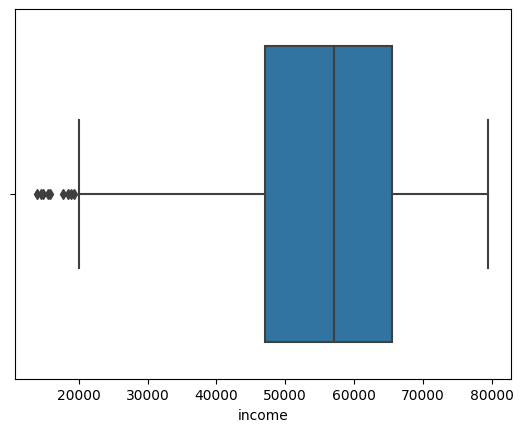

In [24]:
# look at distribution of income to see outliers 
sns.boxplot(data=df, x='income')
# low income < 20000 are outliers 

### 5. Create some important/relevant metrics as new columns


In [39]:
# add a date column 
df['date'] = pd.to_datetime(df['Timestamp']).dt.strftime('%Y-%m-%d')

In [36]:
df.columns

Index(['daily_site_time', 'Age', 'income', 'daily_internet_usage', 'ad_topic',
       'City', 'Male', 'Country', 'Timestamp', 'clicked_ad', 'date',
       'site_time_ratio'],
      dtype='object')

In [40]:
df.date.min(), df.date.max()

('2016-01-01', '2016-07-24')

In [41]:
df[df["date"] > '2016-07-01'].head(1)

,daily_site_time,Age,income,daily_internet_usage,ad_topic,City,Male,Country,Timestamp,clicked_ad,date,site_time_ratio
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0,2016-07-11,0.3802


In [27]:
# add column for site time to total internet time
df['site_time_ratio'] = round(df['daily_site_time'] / df['daily_internet_usage'], 4)
df['site_time_ratio'].head()

0    0.2692
1    0.4140
2    0.2937
3    0.3016
4    0.3031
Name: site_time_ratio, dtype: float64

<Axes: xlabel='site_time_ratio', ylabel='Count'>

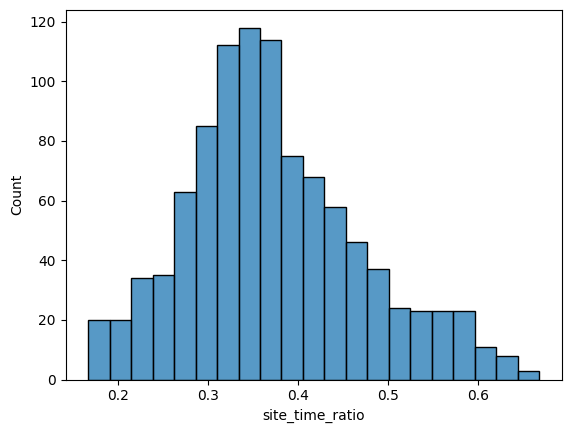

In [42]:
# distribution of site time ratio
sns.histplot(data=df, x='site_time_ratio')

### 6. Boxplots / Pairplot / Correlation for important numeric variables


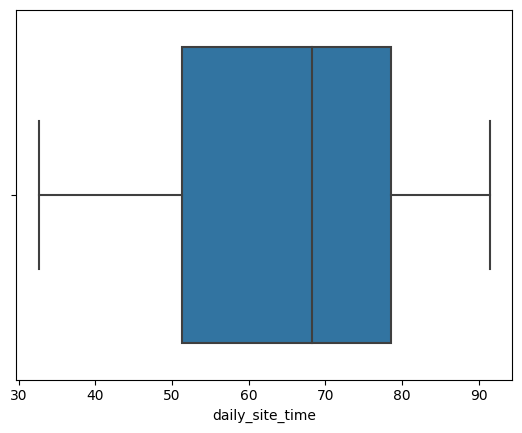

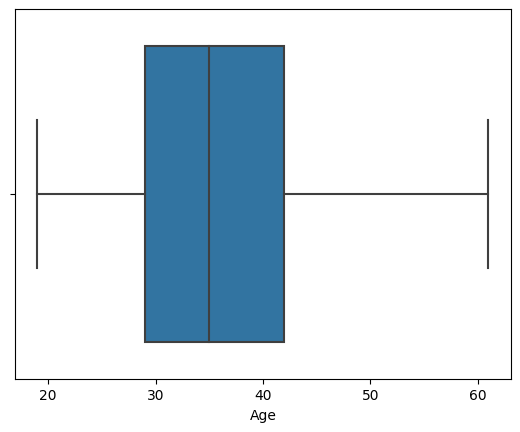

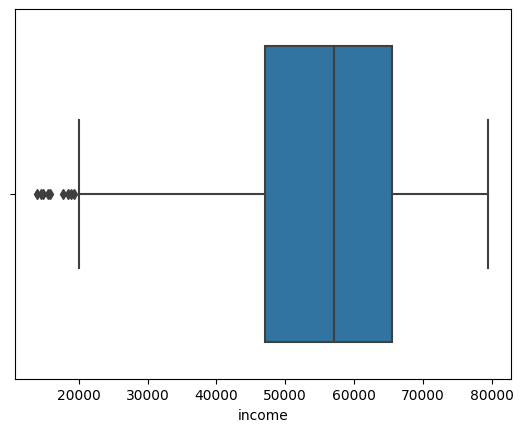

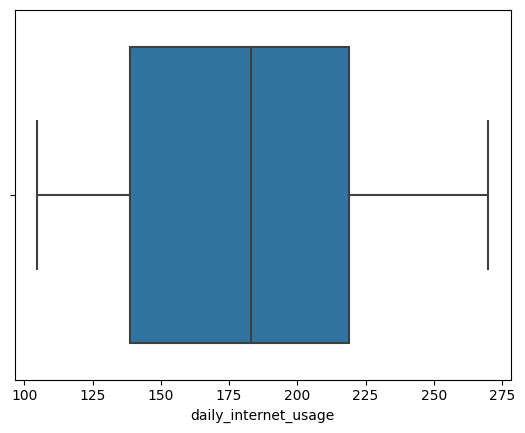

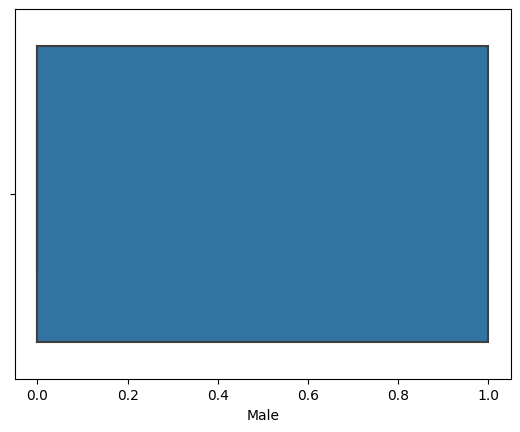

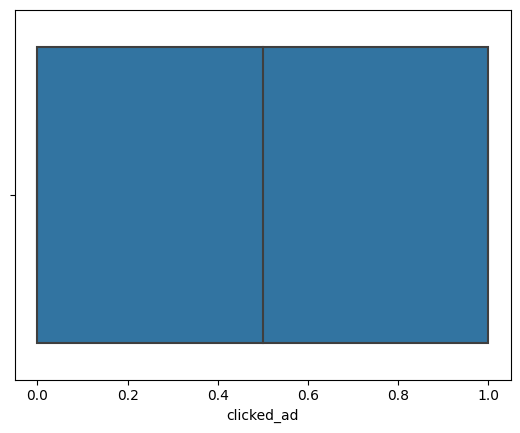

In [49]:
for c in numeric_cols:
    sns.boxplot(data=df, x=c)
    plt.show()

binary_cols=['Male', 'clicked_ad']

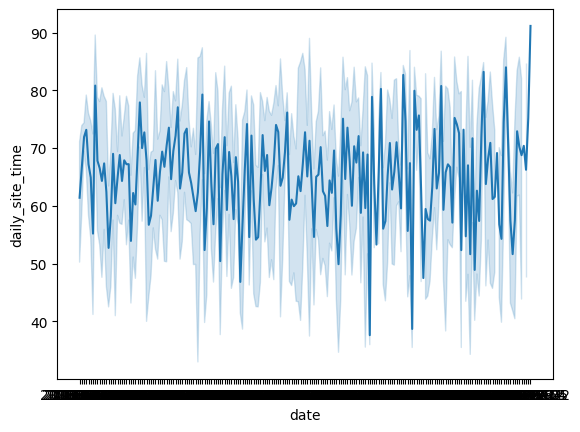

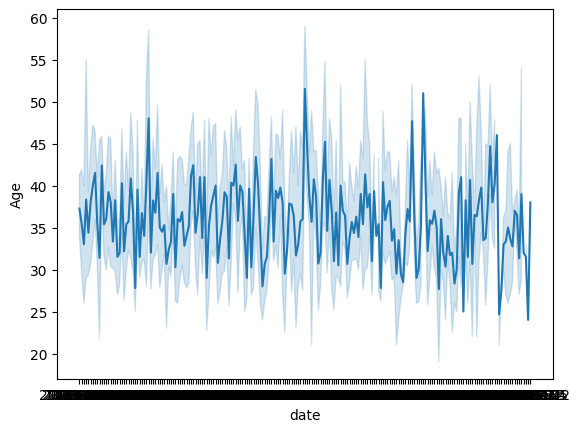

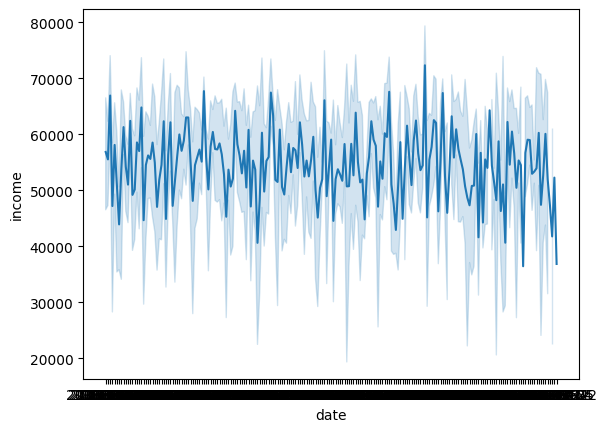

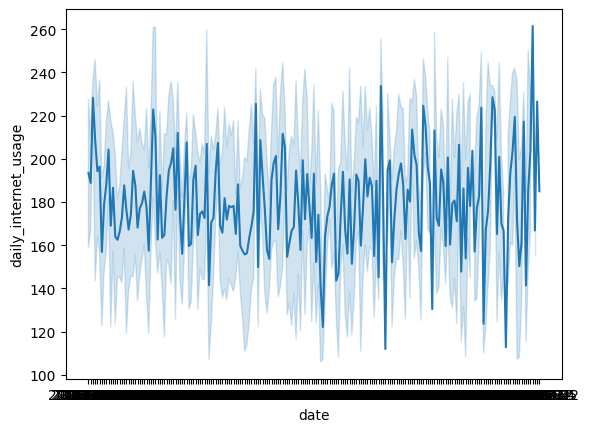

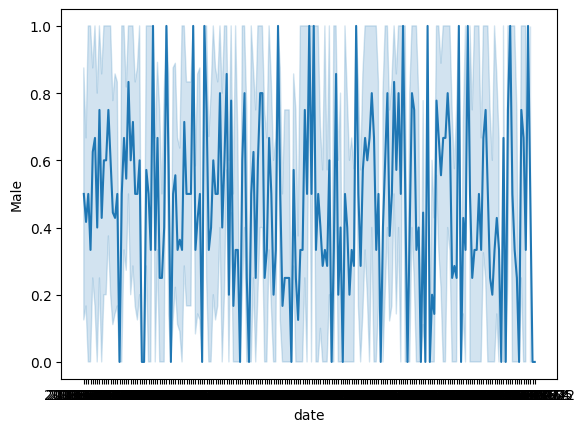

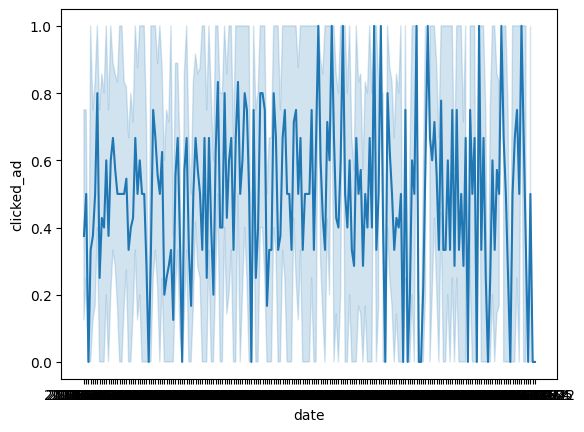

In [70]:
for c in numeric_cols:
    sns.lineplot(data=df, x='date', y=c)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


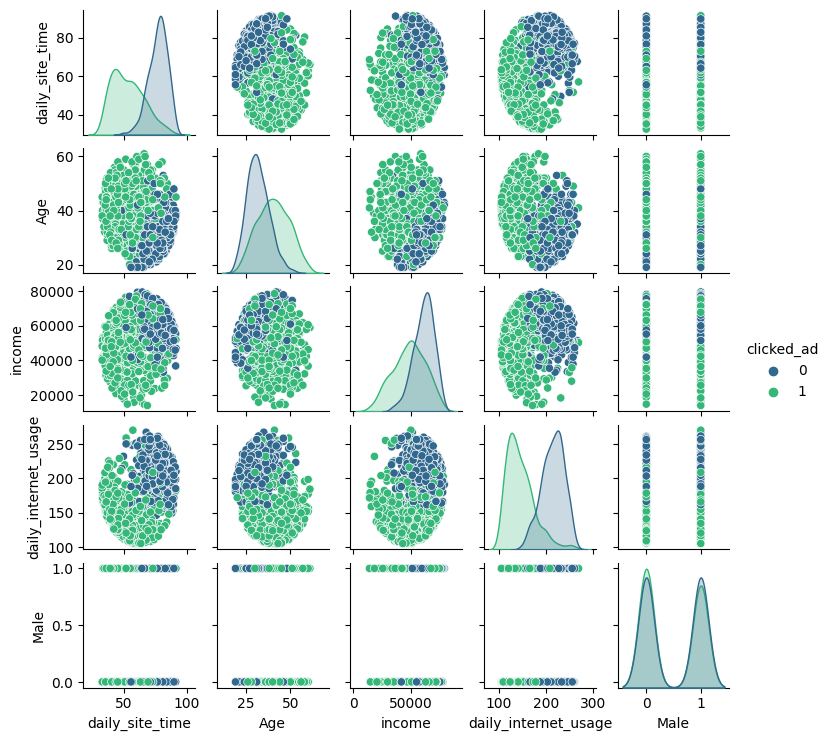

In [54]:
# pairplot of all numeric:
sns.pairplot(df[numeric_cols], hue='clicked_ad', palette='viridis', height=1.5)

Pairplot Observations: 
- the less time users spend on the internet and site the more the clicked ads 
- ovular because the extremes arent likely? no time on internet and no time on site
- age dist of those who don't click ads seems to be centered younger
- income dist of those who don't click ads seems to be centered higher
- males range for internet time is slightly higher

<Axes: >

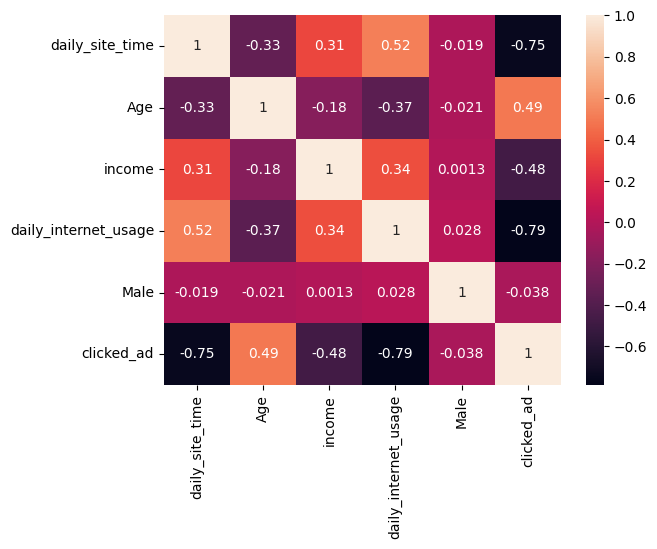

In [56]:
# correlation - heat map
sns.heatmap(df[numeric_cols].corr(), annot=True)

Seems to be a strong negative correlation between time spent online and ads being clicked. 

### 7. Guiding questions -- do some groupbys, look at distributions


In [68]:
# tot male and female
df.groupby('Male')['Male'].count()

Male
0    519
1    481
Name: Male, dtype: int64

In [66]:
# look at ad clicks by gender - pretty even
df.groupby(['Male', 'clicked_ad'])['clicked_ad'].count()

Male  clicked_ad
0     0             250
      1             269
1     0             250
      1             231
Name: clicked_ad, dtype: int64

In [72]:
def bin_age(age):
    # Define the age bins
    bins = list(range(0, 101, 10))  # Bins: [0, 10, 20, ..., 90, 100]
    
    # Define labels for the bins
    labels = [f'{start}-{end}' for start, end in zip(bins[:-1], bins[1:])]
    
    # Use pd.cut() to bin the age
    return pd.cut(age, bins=bins, labels=labels, right=False)

# Assuming 'data' is your DataFrame and 'Age' is the column name
df['Age Group'] = bin_age(df['Age'])

In [74]:
# look at ad clicks by age - most users are 30-40 so it's biased - they're clicked more
df.groupby(['Age Group', 'clicked_ad'])['clicked_ad'].count()

Age Group  clicked_ad
0-10       0               0
           1               0
10-20      0               5
           1               1
20-30      0             194
           1              64
30-40      0             242
           1             169
40-50      0              55
           1             178
50-60      0               4
           1              83
60-70      0               0
           1               5
70-80      0               0
           1               0
80-90      0               0
           1               0
90-100     0               0
           1               0
Name: clicked_ad, dtype: int64

In [82]:
# ad engagement rate (total ads clicked / total rows) by country 
df.groupby('Country')['clicked_ad'].sum() / df.groupby('Country')['clicked_ad'].count()

Country
Afghanistan          0.625000
Albania              0.571429
Algeria              0.500000
American Samoa       0.600000
Andorra              1.000000
                       ...   
Wallis and Futuna    0.250000
Western Sahara       0.571429
Yemen                0.666667
Zambia               0.750000
Zimbabwe             0.666667
Name: clicked_ad, Length: 237, dtype: float64

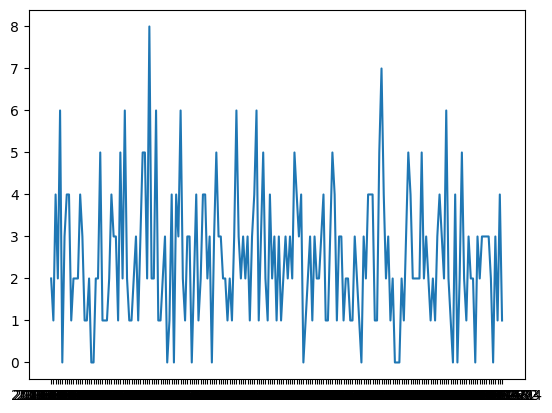

In [86]:
# total ads clicked over time 
clicked_by_date = df.groupby(df['date'])['clicked_ad'].sum()
plt.plot(clicked_by_date.index, clicked_by_date.values)

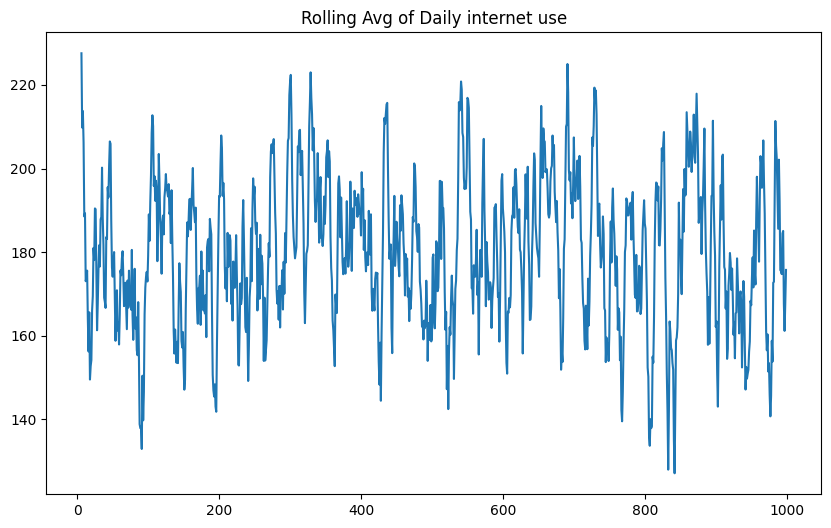

In [90]:
# 7 day moving avg of total ads clicked over dates

rolling_avg = df['daily_internet_usage'].rolling(window=7).mean()

# Plot the rolling average using matplotlib
plt.figure(figsize=(10, 6))
plt.title("Rolling Avg of Daily internet use")
plt.plot(rolling_avg, label='7-day Rolling Avg')


### 8. Conclusions